# Gaia data exploration
Welcome to your second coding lesson-- it's time to get our hands on some real data. This data is from the Gaia satellite, the European Space Agency's **billion star** surveyor.

Today we'll be using the python library Pandas to help us sort and select from our data.
To use Pandas, let's import it and name it pd in the code cell below:

In [ ]:
# fill me in!
import pandas as pd

How does Pandas work?
The main thing we want to use is the Pandas **Dataframe** which makes a nice table to our data with labeled columns and rows. This makes is really easy to visualize, slice, index, etc.

Let's take a quick look at an example dataframe to get a feel for how they work.

In [ ]:
#Note that just like a print statement, we always enclose the whole command in parentheses
#Inside of the parentheses, we include our data in curly braces

pd.DataFrame({'age': [50, 21, 17, 12], 'height': [168, 172, 160, 145]})

,age,height
0,50,168
1,21,172
2,17,160
3,12,145


As you can see above, the strings 'age' and 'height' became column names, and the information in brackets `[]` following the colon is the data that goes into the specified column.

The farthest left column is always the index number of your row (and we always start counting at 0).

In the above example, we made our own data and got to name our columns in real time.

If we read in a big pre-made file of data, we might not know ahead of time what the column names are or how the data is structured, but we can check.

In [ ]:
#first let's give our DataFrame a name

my_df = pd.DataFrame({'age': [50, 21, 17, 12], 'height': [168, 172, 160, 145]})

#check column names

print(my_df.columns)

#just like NumPy, we can check the shape

print(my_df.shape)

Index(['age', 'height'], dtype='object')
(4, 2)


Sometimes you may want to select individual columns from a Dataframe.

In [ ]:
age = my_df['age'] #this is one way to select a column and name it age
#age = my_df.age #this way also works!

print(type(age))
age

<class 'pandas.core.series.Series'>


0    50
1    21
2    17
3    12
Name: age, dtype: int64

When you select an individual column, you make a Pandas series. This is just like the column, but it strips off the column header or name. Pretty useful if you want to work with just the numbers!

Select the other column, height, and make it into a Pandas series named height

In [ ]:
height = my_df['height']
height

0    168
1    172
2    160
3    145
Name: height, dtype: int64

Let's try plotting our Pandas series data.

In [ ]:
#How do we import our plotting library??

import matplotlib.pyplot as plt
%matplotlib inline

Write code to make a line graph with age on the x-axis and height on the y-axis. Add a title to your plot and label your x and y axis.

Text(0.5, 1.0, 'height vs. age')

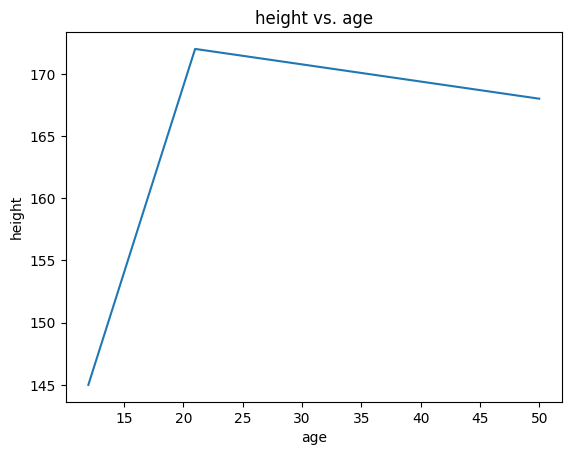

In [ ]:
plt.plot(age, height)
plt.xlabel("age")
plt.ylabel("height")
plt.title("height vs. age")

We could also plot same thing as above, but using matplotlib subplots. This lets you control your figure and axes seperately and can be useful if you want to make several plots at once or if you need to do something funky to your axes.

Text(0.5, 1.0, 'the same plot as before')

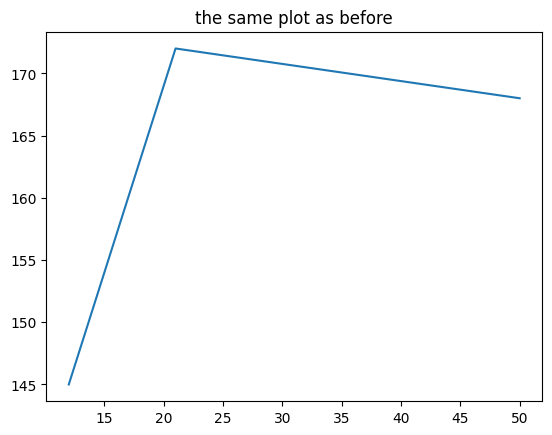

In [ ]:
# now we assign two variables, fig and ax
fig, ax = plt.subplots()

#now instead of "plt." at the beginning of our plotting statement, ie: plt.plot(x,y), we'll use ax.plot to mean the same thing
ax.plot(age, height)
ax.set_title('the same plot as before')

Now imagine we had a second set of height data for folks of the same age as before.

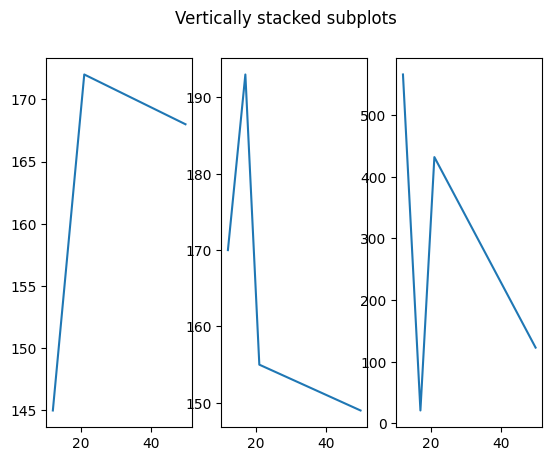

In [ ]:
height2 = [149, 155, 193, 170]
height3= [123, 432, 21, 566]

# we tell subplots how many plots to expect in the argument
fig, axs = plt.subplots(1, 3)  # this time I used "axs" instead of "ax" because we have two of them, but this is only a convention

# if we want to do something global to our figure, we use the prefix "fig."
# this will give us just one title for both plots
fig.suptitle('Vertically stacked subplots')

# now that I have two different axes, I have to tell python which one I want to plot on
axs[0].plot(age, height)
axs[1].plot(age, height2)
axs[2].plot(age, height3)

There are tons of fun (and often beautiful!) things you can do with subplots and we encourage you to do some of your own exploration.

Here's the official documentation from Matplotlib with loads of cool examples: [documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html)

If you get stuck trying to do something with subplots, try visiting this website or doing a quick google search to see if you can troubleshoot it on your own-- it's really the best way to learn!

Below, show us something cool you learned from the Matplotlib subplots documentation (it's okay to copy paste, but remember that you should be able to explain in work you turn in, including this).

Text(0, 0.5, 'height')

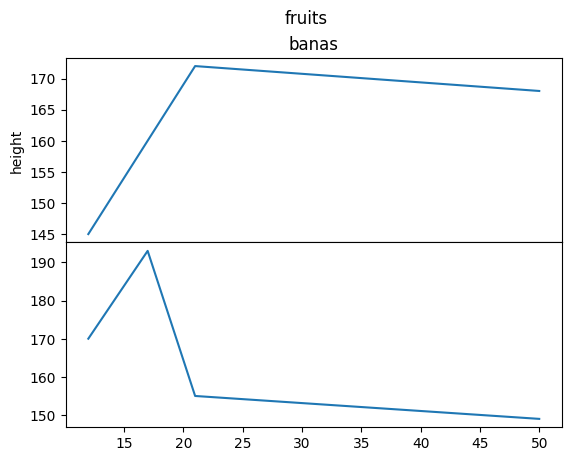

In [ ]:
# your cool new subplots tricks go here
# if you need some inspiration, see if you can find the commands to label your axes
fig, axs = plt.subplots(2)
axs[0].plot(age, height)
axs[1].plot(age, height2)
fig.subplots_adjust(hspace=0)

fig.suptitle("fruits")
axs[0].set_title("banas")

axs[0].set_ylabel("height")

# Gaia

Let's try to apply what we learned to a real data set from Gaia.

In [ ]:
#this is a github link to the data file we want to read in. It is in the form of a csv file.
M4_data_link = 'https://raw.githubusercontent.com/kayla-owens/stars-summer-class/main/NGC_6121_M_4.csv'

### watch out below!

many things have been left blank intentionally in the following code! Read the comments to figure out what's missing! You'll need to fill it in for your code to work.

In [ ]:
# to load the csv file with pandas, you can use the following code which will automatically creat a DataFrame from the csv file and name it df
df = pd.read_csv(M4_data_link)

# write two print statements to figure out the column names and the shape of this data
print(df.columns)
print(df.shape)

Index(['source_id', 'ra', 'dec', 'x', 'y', 'plx', 'pmra', 'pmdec', 'plxe',
       'pmrae', 'pmdece', 'pmcorr', 'g_mag', 'bp_rp', 'Sigma', 'qflag',
       'memberprob'],
      dtype='object')
(69417, 17)


That's a lot of data! Let's see what it looks like by using the head and tail commands.

In [ ]:
# head prints the DataFrame from the top out to the number of rows you specify in the argument
# df.head(5)

# what happens if you give no argument?
df.head()

,source_id,ra,dec,x,y,plx,pmra,pmdec,plxe,pmrae,pmdece,pmcorr,g_mag,bp_rp,Sigma,qflag,memberprob
0,6045373319049695744,245.432862,-26.803479,-0.4140,-0.2785,0.3049,-3.6888,-1.6686,0.1348,0.1904,0.1179,-0.1805,18.0608,1.4185,15.28,3,0.00000
1,6045373319049693952,245.435948,-26.805160,-0.4113,-0.2801,0.4490,-3.9480,-6.1717,0.2015,0.2820,0.1802,-0.1583,18.7306,1.9499,15.29,3,0.00000
2,6045373319049696768,245.433682,-26.800814,-0.4133,-0.2758,0.5428,-1.8009,-0.7245,0.0676,0.0928,0.0631,-0.2493,16.9033,1.4451,15.30,3,0.00000
3,6045373387765952768,245.426876,-26.796526,-0.4194,-0.2715,-1.9937,-8.4559,-9.1039,2.4028,2.7038,2.0688,-0.0295,20.8674,1.1065,15.27,0,0.00001
4,6045373383465798528,245.432582,-26.799282,-0.4143,-0.2743,0.0515,0.7050,-6.9627,0.2434,0.3369,0.2249,-0.2194,18.9903,1.4350,15.30,3,0.00000


If you want to know what the end of your DataFrame looks like, you can use the tail command which works the same way but from the bottom up.

In [ ]:
df.tail(3)

,source_id,ra,dec,x,y,plx,pmra,pmdec,plxe,pmrae,pmdece,pmcorr,g_mag,bp_rp,Sigma,qflag,memberprob
69414,6045496258202123008,246.374777,-26.276244,0.4286,0.2487,0.5212,0.5858,-0.1660,0.0583,0.0817,0.0523,0.1295,16.2885,1.3591,15.31,3,0.0
69415,6045496185173578752,246.380509,-26.279497,0.4338,0.2454,0.4909,-0.1161,-3.0334,0.1577,0.2058,0.1379,0.0707,18.2071,1.3527,15.29,2,0.0
69416,6045497044167049344,246.370639,-26.262326,0.4250,0.2626,0.3626,-4.9140,-1.6735,0.2761,0.3768,0.2471,0.1179,19.1273,1.2803,15.27,2,0.0


We learned it today's lecture that the color of a star can tell us about its temperature and brightness. Which columns in the data frame seem like they're about color?

We're going to make our own color magnitude diagram from the Gaia data. Pull out the two columns that contain color information and assign them each to their own Pandas series with a descriptive name.

In [ ]:
bp_rp = df["bp_rp"]    # BP - RP color (temperature)
g = df["g_mag"]        # G magnitude (brightness of the star)

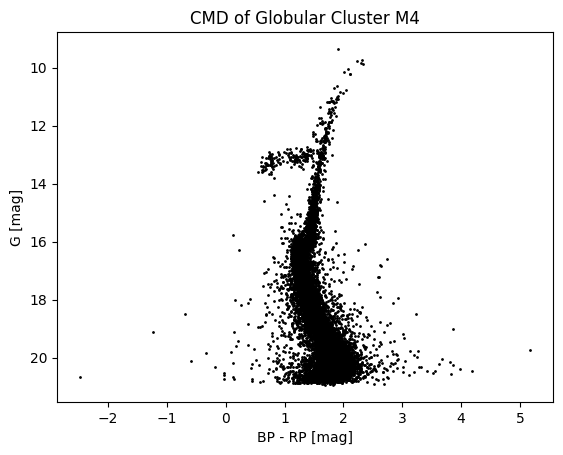

In [ ]:
# now we want to filter on the probability of the star being a cluster member
# some members have very low probability, and will lower the contrast of the CMD
# let's make the 'memberprob' column into its own Pandas series
member_prob = df["memberprob"]


# this is an array of true/false, set to true where the probability of cluster membership is >50%
prob_50 = member_prob > 0.5 # you can change this to values between 0 and 1 to see how it affects the plot!

filtered_bp_rp = bp_rp[prob_50] # use the array of true/false to select only high probability cluster member stars
filtered_g = g[prob_50]

# plotting function
fig, ax = plt.subplots()
ax.scatter(filtered_bp_rp, filtered_g, color='black', s=1)
ax.invert_yaxis() # magnitude is on an inverted scale with respect to brightness, so invert this axis
ax.set_xlabel('BP - RP [mag]') # always label your axes :)
ax.set_ylabel('G [mag]')
ax.set_title('CMD of Globular Cluster M4')
plt.show()

**Question 1:** Label the different stages of stellar evolution that you can see on this CMD.


**Question 2:** Thinking about the populations that you see in the CMD, would you say that this cluster of stars is relatively "young" or "old"?

**Answer to Question 1:**

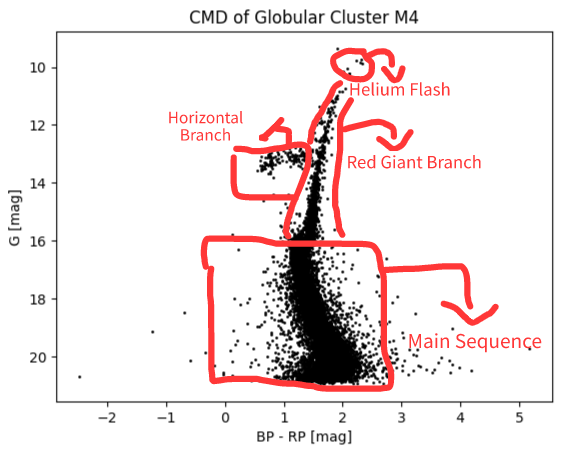

**Answer to Question 2:**
I would say that this plot is older, as it is more clustered together, like that of the globular clusters shown by Kayla on her presentation (globular clusters have more stars and are generally older, so we can use that relation). In addition, the top-ish of the main sequence seems to be shifted onto the Red Giant Branch, another telltale sign of its age.

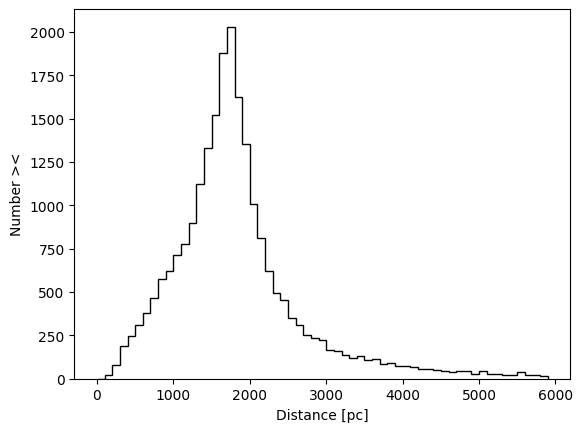

In [ ]:
import numpy as np

# parallax in milliarcseconds, filtered for probability of membership
plx_mas = df['plx'][prob_50]
# parallax in arcseconds
plx_as = plx_mas / 1000
# distance in parsecs, simply 1/parallax in arcseconds
distance_pc = 1/plx_as

# plot the histogram of distances for the individual stars
plt.hist(distance_pc, bins=np.arange(0, 6000, 100), histtype='step', color='black')
plt.xlabel('Distance [pc]')
plt.ylabel("Number ><")

plt.show()

# plt.hist(plx_mas, bins=np.arange(0, 1.2, 0.05))
# plt.show()

**Question 3:** Estimate the distance (and an appropriate error) from the histogram for this globular cluster. Explain your reasoning for both values. There are many valid ways to approach this, particularly for the error estimation.

**BONUS question:** Why is this histogram substantially asymmetric? (hint: plot a histogram of the parallaxes in mas with bins=np.arange(0, 1.2, 0.05) and then think about how that histogram translates to distances)

**Question 4** Given the distance you calculated above, what is the absolute G magnitude of the brightest stars in the CMD (i.e. at an apparent magnitude of ~10 mag)? Show your calculations and propagate errors.

**Answer to Question 3:**
An estimate for the distance of the cluster is about 1680 parsecs, with an error of about 700 parsecs. I used the median function to find the middle of the histogram data, and then I estimated about ±34%, which seemed to be about 700 parsecs on either side.

**Answer to BONUS Question:**
I believe that the histogram is asymmetric because of the scale of 6000 used to graph the information. Using the scale of 1.2 (which has less room for variation) causes some of the data to be lumped into "more general" groups that even out to a almost symmetrical graph.

**Answer to Question 4:**
Given the distance of about 1680 ± 700 parsecs, the absolute G magnitude is -1.12655 mag. Firstly, you would use the distance modulus formula to get m - M = 5log(d) - 5. Substitute 10 mag for m and 1680 for d to get 10 - M = 11.12655 after simplifying, making M -1.12655 mag. To propagate error, we can use the equation Δz = | f'(d) | × Δd to find the variation, with Δz being the error propagation, f(d) being the function 10 - 5 × log(d/10), and Δd is the error of the distance, d. After plugging in 1680 as d and 700 as Δd, we get an error propogation of 700 × | -1/(336*ln(10) |, or 0.90478. This means that our final answer, with error propogation, is -1.12655 ± 0.90478 mag.

Another way to propagate the error would just to solve 10 - 5 × log((1680-700)/10) for the lower bound and 10 - 5 × log((1680+700)/10) as the upper bound. This would give an answer of -1.12655 mag as our central bound, 0.04387 mag as our lower bound, and -1.88288 mag as our upper bound.

*Note: I wasn't really sure how to propagate the error, so I tried multiple methods!!

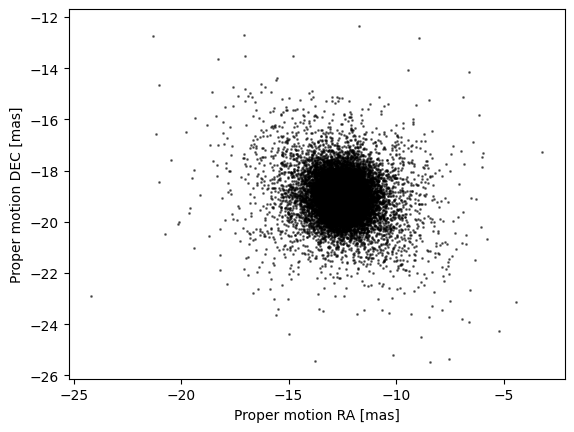

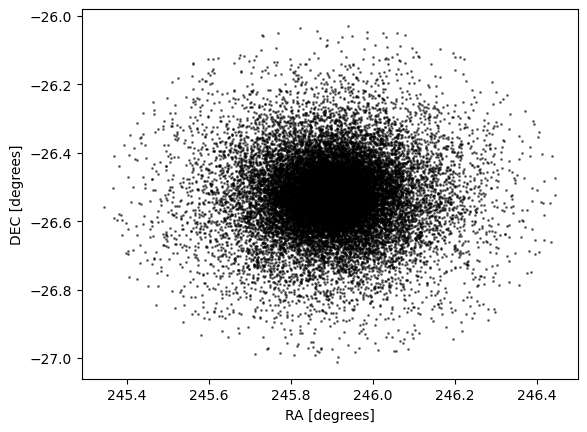

In [ ]:
pm_ra = df['pmra'][prob_50]
pm_dec = df['pmdec'][prob_50]

# plot showing the proper motions in both RA and DEC of the cluster members
plt.scatter(pm_ra, pm_dec, color='black', s=1, alpha=0.5)
plt.xlabel('Proper motion RA [mas]')
plt.ylabel('Proper motion DEC [mas]')
plt.show()

ra = df['ra'][prob_50]
dec = df['dec'][prob_50]

# plot showing the RA and DEC (position on the sky) of the cluster members
plt.scatter(ra, dec, color='black', s=1, alpha=0.5)
plt.xlabel('RA [degrees]')
plt.ylabel('DEC [degrees]')
plt.show()

**Question 5** Why do we expect the cluster star members to be physically associated (close together on the sky) and moving together (similar proper motions in both RA and DEC)?

**Answer to Question 5:**
Because the data seems to propogate in one main area, it shows how the cluster seemingly 'groups' together in the ball of influence. This ball of influence links the stars together, both in proper motion and on the celestial spehere.

<TableColumns names=('RA_ICRS','DE_ICRS','Source','Plx','pmRA','pmDE','RV','Gmag','BP-RP','Proba','Cluster','_RA_icrs','_DE_icrs')>
1.2885003095975234


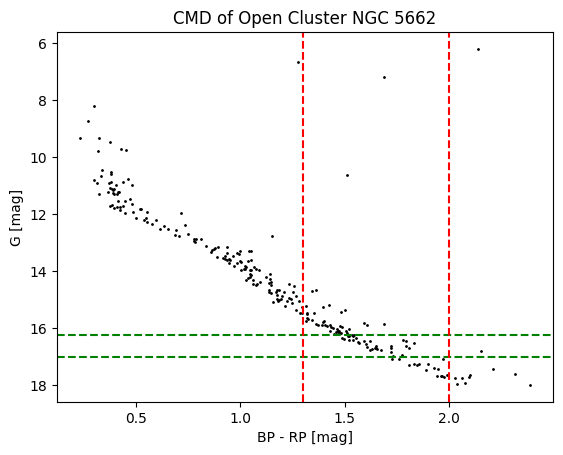

In [ ]:
# We will now be working with a common astronomical data format called "fits" which stands for
# "Flexible Image Transport System"

# These files are composed of data and header information that generally tells you
# what sort of data is in the file, how it is organized, when/how the data was taken
# and then if it is an image, it gives information about where it is in the sky

# In this case, we are working with a fits table, which is a fairly minimal file

# astropy has numerous tools for astronomical data, including these handy functions
# for reading fits files and making tables
from astropy.io import fits
from astropy.table import Table
NGC_5662_data_file = 'https://raw.githubusercontent.com/kayla-owens/stars-summer-class/main/NGC_5662.fit'

# open the fits file
hdu = fits.open(NGC_5662_data_file)
# extract the data and turn it into astropy table format
dat = Table(hdu[1].data)
# see what columns we have to work with
print(dat.columns)

# me when i find the parallax :blush:
print(dat['Plx'].mean())

### Code below is essentially identical to the code above for the globular cluster
### but with different names for the columns in the data file

# set our variables for making the color magnitude diagram
bp_rp = dat['BP-RP'] # BP - RP color (temperature)
g = dat['Gmag'] # G magnitude (brightness of the star)

# now we want to filter on the probability of the star being a cluster member
# some members have very low probability, and will lower the contrast of the CMD
member_prob = dat['Proba']

# this is an array of true/false, set to true where the probability of cluster membership is >50%
prob_50 = member_prob > 0.5 # you can change this to values between 0 and 1 to see how it affects the plot!

filtered_bp_rp = bp_rp[prob_50] # use the array of true/false to select only high probability cluster member stars
filtered_g = g[prob_50]

# plotting function
fig, ax = plt.subplots()
ax.scatter(filtered_bp_rp, filtered_g, color='black', s=1)
ax.invert_yaxis() # magnitude is on an inverted scale with respect to brightness, so invert this axis
ax.set_xlabel('BP - RP [mag]') # always label your axes :)
ax.set_ylabel('G [mag]')
ax.set_title('CMD of Open Cluster NGC 5662')
ax.axhline(17, color="green", linestyle="dashed")
ax.axhline(16.2474, color="green", linestyle="dashed")
ax.axvline(1.3, color="red", linestyle="dashed")
ax.axvline(2.0, color="red", linestyle="dashed")
plt.show()

**Question 6** Does this cluster appear different from the globular cluster from above? If you think so, then speculate why.

**Question 7** Take a look at the color range 1.3 < BP-RP < 2.0. There is a line of stars hovering above the main sequence. Those are binary stars that whose light has blended causing them to appear as a single star in the CMD.

a. Calculate the magnitude value you would obtain from the summed light of two 15th magnitude stars and for two 17th magnitude stars. (Hint: magnitudes must be added in flux space)

b. Calculate the difference between your calculated summed magnitudes and the individual stars' magnitudes (for each the 15th magnitude pair and the 17th magnitude pair).

c. Is this difference consistent with the location of the binary sequence above the main sequence in this plot?

**Answer to Question 6:**
It appears different from the globular cluster from above, with it being less dense and overall being more linear.

**Answer to Question 7a:**
The magnitude value after the summation of two 15 magnitude stars is 14.2474, while the magnitude value after the summation of two 17 magnitude stars is 16.2474.

**Answer to Question 7b:**
The difference between the calculated magnitudes and the individual magnitude star is 0.752575 for both the 15 magnitude and the 17 magnitude star.

**Answer to Question 7c:**
This answer seems to be shown in the CMD, with there being about a 0.752575 difference between the binary sequence and the regular sequence (as shown by the green lines, and how the cluster of stars near the top green line would effectively be moved down closer to the main sequence)

**Note: I added some dashed lines to help me visualize the color range and to better show the displacement :P

Index(['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'LogL', 'LogTe',
       'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2',
       'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn',
       'Xo', 'Cexcess', 'Z', 'mbolmag', 'Gmag', 'G_BPmag', 'G_RPmag'],
      dtype='object')


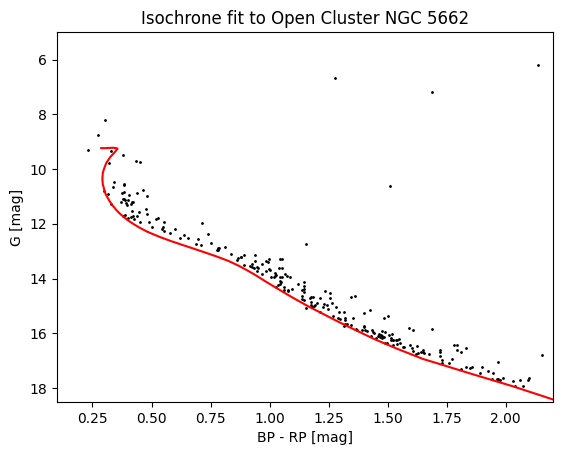

In [ ]:
# Now we are going to perform isochrone fitting to this open cluster.
# We have already selected an isochrone of appropriate metallicity and age, so
# the only adjustable parameters are the distance and the amount of interstellar
# extinction/reddening.

# download and parse the isochrone data
isochrone_link = 'https://raw.githubusercontent.com/kayla-owens/stars-summer-class/main/parsec_age8.45_metal0.00.dat'
df = pd.read_csv(isochrone_link)
print(df.columns)

# extract colors and G magnitudes for the isochrone
BP_RP = df['G_BPmag'] - df['G_RPmag']
G = df['Gmag']

# values of reddening coefficients based on Cardelli et al. 1989 reddening law
# these are calculated based on the central wavelength of the filters G, BP, and
# RP, but ask Kayla if you want to know more about how that actually looks/works
R_BP = 1.039
R_RP = 0.602
R_G  = 0.792

########################################################

# CHANGE THESE VALUES TO PERFORM THE FITTING
EBV = 0.282 # value of the extinction E(B-V)
DM = 9.680 # value of the distance modulus to the galaxy

########################################################

# translation between E(B-V) and the effective extinction in this color/magnitude combination
BP_RP_reddening = EBV * 3.1 * (R_BP - R_RP)
G_extinction = EBV * 3.1 * R_G

# plotting, including the isochrone that is being fitted
fig, ax = plt.subplots()
ax.scatter(filtered_bp_rp, filtered_g, color='black', s=1)
ax.plot(BP_RP+BP_RP_reddening, G+G_extinction+DM, color='red')
ax.set_xlim(0.1, 2.2)
ax.set_ylim(18.5, 5)
ax.set_xlabel('BP - RP [mag]') # always label your axes :)
ax.set_ylabel('G [mag]')
ax.set_title('Isochrone fit to Open Cluster NGC 5662')
plt.show()

**Question 8** Adjust the values of the extinction E(B-V) and the distance modulus m-M (DM) to fit the isochrone to the *bottom* of the main sequence. Report your best fit values here. Convert distance modulus to distance in parsecs.

**Question 9** Calculate the distance in parsecs to the cluster based on the Gaia parallaxes of the cluster member stars.

**Question 10** Compare the two distance values. Do they agree? If not, why might you be finding differences?

**Answer to Question 8:**
The best fit value for extinction E(B-V) was 0.282 and the best fit value for the distance modulus μ (DM) was 9.70. With a distance modulus of 9.70, the distance is 870.964 parsecs.

**Answer to Question 9:**
Taking the mean of the parallaxes as a safe average, we have a parallax of 1.2885003095975234 mas. We then inverse this to get a distance of 776.096 parsecs.

**Answer to Question 10:**
The two distances do not agree. I believe the main reaon why there is a difference is because the distance modulus-calculated distance was based off of best fit values, which may not truely reflect the cluster and its distance to the best precision. Another reason could be because the amount of sig figs on the best fit values were much less than the parallax mean, meaning that the distance modulus was always somewhat less precise compared to the parallax.